In [1]:
import numpy as np
import pandas as pd
import keras
import imageio
import os
import matplotlib.pyplot as plt
from keras.applications import ResNet50
from keras.applications import VGG16
from keras.models import Model
from keras.optimizers import Adam
from keras.preprocessing import image
from scipy.misc import imresize
from sklearn.neighbors import KDTree

Using TensorFlow backend.


In [2]:
os.chdir('..')
rootdir = os.getcwd()
datadir = os.path.join(rootdir,'smalldataset')

In [3]:
strarr = [int(i[:-4]) for i in os.listdir(datadir)]
strarr.sort()
f = lambda x: str(x)+'.jpg'
sorted_ims = [f(i) for i in strarr]
pics = [(datadir+'\\')+i for i in sorted_ims]
images = [imageio.imread(i) for i in pics]

In [4]:
model = ResNet50(weights='imagenet',include_top=True)

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
ims = np.array(images)
ims = ims/255
ims_resized = np.array([imresize(img, (224,224)) for img in ims])

C:\Users\narayani.wagle\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
out = model.predict(ims_resized)
tree = KDTree(out)

<function matplotlib.pyplot.show(*args, **kw)>

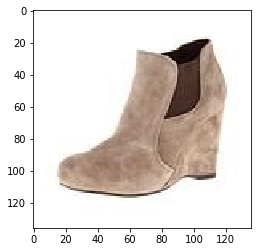

In [42]:
ioi = 28 #index of image to search
test_image = images[ioi]
plt.imshow(images[ioi])
plt.show

In [45]:
test_im = np.array(test_image)
test_im = imresize(test_im, (224,224))
test_im = np.expand_dims(test_im,axis=0)
test_out = model.predict(test_im)
dist, ind = tree.query(test_out,k=3) #k=#matches

C:\Users\narayani.wagle\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  


<function matplotlib.pyplot.show(*args, **kw)>

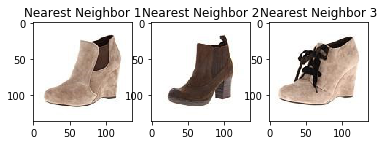

In [46]:
fig = plt.figure()
n = 1
for i in ind[0]:
    a = fig.add_subplot(1,3,n)
    plt.imshow(images[i])
    title = 'Nearest Neighbor ' + str(n)
    a.set_title(title)
    n = n+1
plt.show